<a href="https://colab.research.google.com/github/lmartins30/SENAC-SP/blob/main/End_to_end_Empl_Senac_SJRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Abrindo o Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Employee.csv to Employee.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Employee.csv']))
# Dataset is now stored in a Pandas Dataframe

## Estrutura dos Dados

In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
df["Education"].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [ ]:
df["City"].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

In [ ]:
df["Gender"].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

In [ ]:
df["EverBenched"].value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

In [ ]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Saving figure attribute_histogram_plots


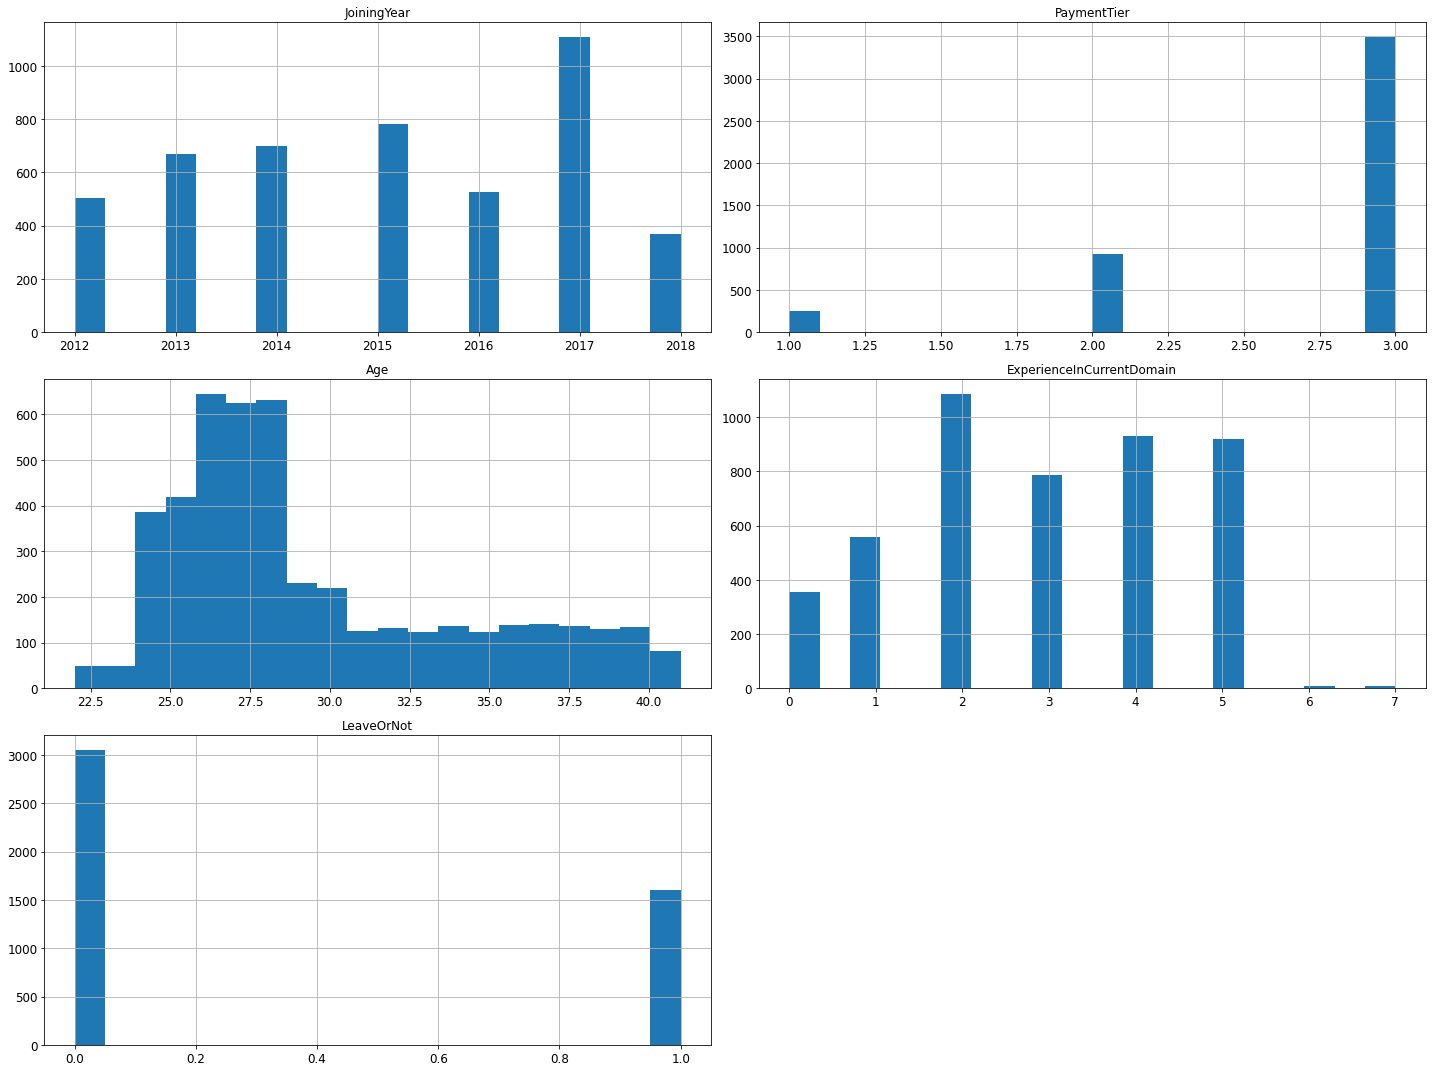

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## Looking for Correlations

In [ ]:
corr_matrix = df.corr()

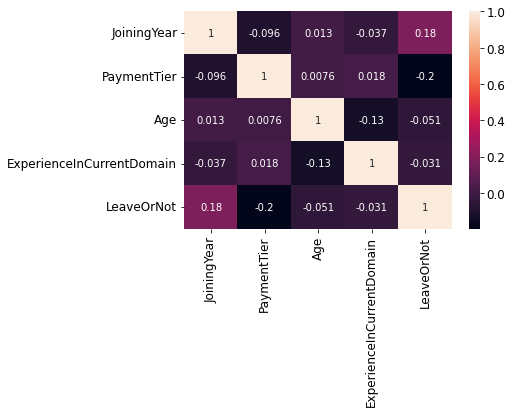

In [ ]:
import seaborn as sns
sns.heatmap(corr_matrix,annot=True)

In [ ]:
corr_matrix["LeaveOrNot"].sort_values(ascending=False)

LeaveOrNot                   1.000000
JoiningYear                  0.181705
ExperienceInCurrentDomain   -0.030504
Age                         -0.051126
PaymentTier                 -0.197638
Name: LeaveOrNot, dtype: float64

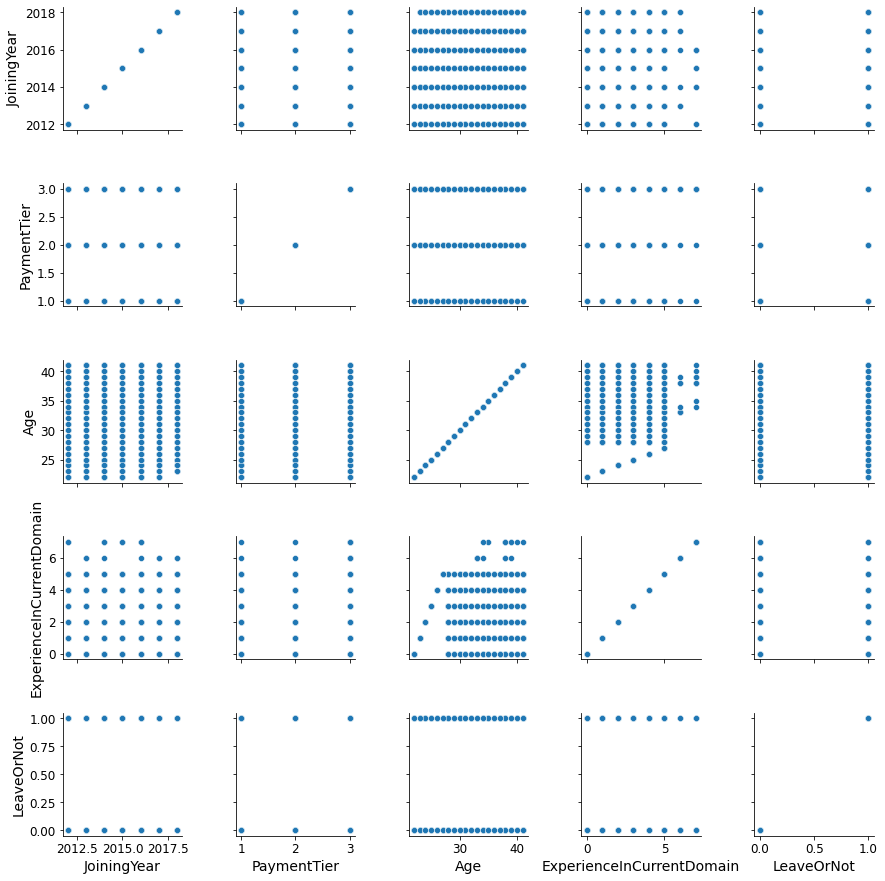

In [ ]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

In [ ]:
df_freq_norm= pd.crosstab(df['Education'],df['LeaveOrNot'], normalize='index')
round(df_freq_norm*100,0)

LeaveOrNot,0,1
Education,,
Bachelors,69.0,31.0
Masters,51.0,49.0
PHD,75.0,25.0


In [ ]:
df_freq_norm= pd.crosstab(df['JoiningYear'],df['LeaveOrNot'], normalize='index')
round(df_freq_norm*100,0)

LeaveOrNot,0,1
JoiningYear,,
2012,78.0,22.0
2013,67.0,33.0
2014,75.0,25.0
2015,59.0,41.0
2016,78.0,22.0
2017,73.0,27.0
2018,1.0,99.0


In [ ]:
df_freq_norm= pd.crosstab(df['City'],df['LeaveOrNot'], normalize='index')
round(df_freq_norm*100,0)

LeaveOrNot,0,1
City,,
Bangalore,73.0,27.0
New Delhi,68.0,32.0
Pune,50.0,50.0


In [ ]:
df_freq_norm= pd.crosstab(df['PaymentTier'],df['LeaveOrNot'], normalize='index')
round(df_freq_norm*100,0)

LeaveOrNot,0,1
PaymentTier,,
1,63.0,37.0
2,40.0,60.0
3,72.0,28.0


In [ ]:
df_freq_norm= pd.crosstab(df['Age'],df['LeaveOrNot'], normalize='index')
round(df_freq_norm*100,0)

LeaveOrNot,0,1
Age,,
22,61.0,39.0
23,67.0,33.0
24,60.0,40.0
25,58.0,42.0
26,65.0,35.0
27,64.0,36.0
28,70.0,30.0
29,67.0,33.0
30,65.0,35.0


In [ ]:
df_freq_norm= pd.crosstab(df['Gender'],df['LeaveOrNot'], normalize='index')
round(df_freq_norm*100,0)

LeaveOrNot,0,1
Gender,,
Female,53.0,47.0
Male,74.0,26.0


In [ ]:
df_freq_norm= pd.crosstab(df['EverBenched'],df['LeaveOrNot'], normalize='index')
round(df_freq_norm*100,0)

LeaveOrNot,0,1
EverBenched,,
No,67.0,33.0
Yes,55.0,45.0


In [ ]:
df_freq_norm= pd.crosstab(df['ExperienceInCurrentDomain'],df['LeaveOrNot'], normalize='index')
round(df_freq_norm*100,0)

LeaveOrNot,0,1
ExperienceInCurrentDomain,,
0,65.0,35.0
1,66.0,34.0
2,63.0,37.0
3,62.0,38.0
4,68.0,32.0
5,69.0,31.0
6,75.0,25.0
7,67.0,33.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df_num=pd.get_dummies(df,drop_first=True)

In [ ]:
df_num.head(2)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,3,34,0,0,0,0,0,0,1,0
1,2013,1,28,3,1,0,0,0,1,0,0


In [ ]:
corr_matrix_num = df_num.corr()

In [ ]:
corr_matrix_num["LeaveOrNot"].sort_values(ascending=False)

LeaveOrNot                   1.000000
City_Pune                    0.206264
JoiningYear                  0.181705
Education_Masters            0.145801
EverBenched_Yes              0.078438
ExperienceInCurrentDomain   -0.030504
City_New Delhi              -0.033341
Education_PHD               -0.038938
Age                         -0.051126
PaymentTier                 -0.197638
Gender_Male                 -0.220701
Name: LeaveOrNot, dtype: float64

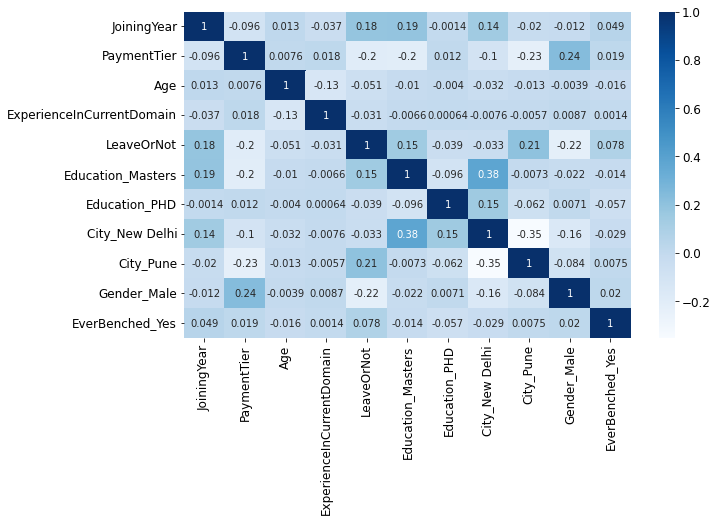

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix_num,annot=True,cmap='Blues')

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(df_num.drop(columns='LeaveOrNot'), df_num['LeaveOrNot'], random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(120, activation="relu"))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(2, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
82/82 [==============================] - 1s 4ms/step - loss: 0.6620 - accuracy: 0.6250 - val_loss: 0.6162 - val_accuracy: 0.7251
Epoch 2/50
82/82 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.7156 - val_loss: 0.5841 - val_accuracy: 0.7400
Epoch 3/50
82/82 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.7374 - val_loss: 0.5595 - val_accuracy: 0.7377
Epoch 4/50
82/82 [==============================] - 0s 3ms/step - loss: 0.5523 - accuracy: 0.7427 - val_loss: 0.5414 - val_accuracy: 0.7365
Epoch 5/50
82/82 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.7531 - val_loss: 0.5271 - val_accuracy: 0.7549
Epoch 6/50
82/82 [==============================] - 0s 2ms/step - loss: 0.5223 - accuracy: 0.7584 - val_loss: 0.5151 - val_accuracy: 0.7606
Epoch 7/50
82/82 [==============================] - 0s 3ms/step - loss: 0.5116 - accuracy: 0.7622 - val_loss: 0.5064 - val_accuracy: 0.7629
Epoch 8/50
82/82 [==

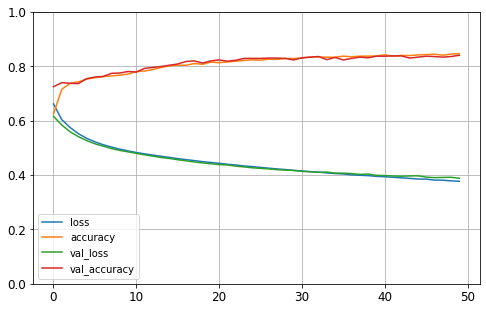

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
# save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8574


[0.362557590007782, 0.8573883175849915]

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 10)                0         
                                                                 
 dense_31 (Dense)            (None, 120)               1320      
                                                                 
 dropout_23 (Dropout)        (None, 120)               0         
                                                                 
 dense_32 (Dense)            (None, 80)                9680      
                                                                 
 dropout_24 (Dropout)        (None, 80)                0         
                                                                 
 dense_33 (Dense)            (None, 30)                2430      
                                                                 
 dropout_25 (Dropout)        (None, 30)               

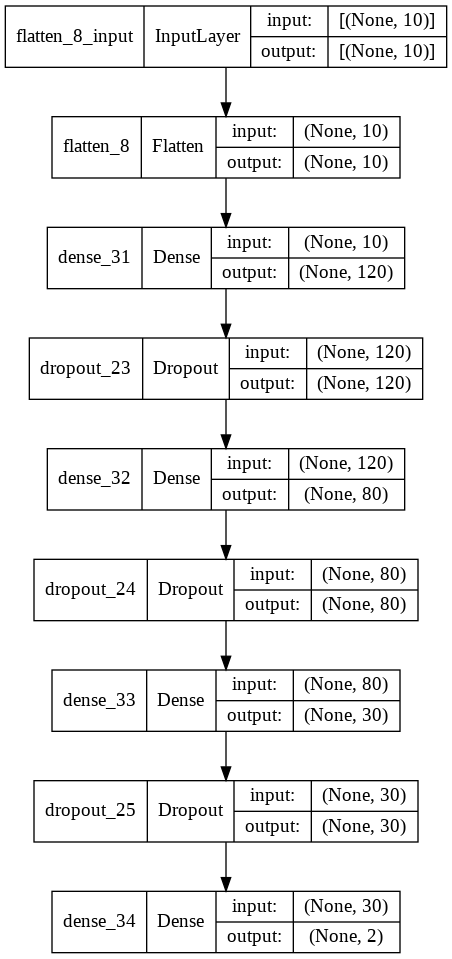

In [ ]:
keras.utils.plot_model(model, "Func.png", show_shapes=True)

** Modelo com 3 camadas de Dense separadas por camdas de Dropout com taxa de 20%. Camada final de Softmax já que é uma previsão binária ( 1 ou 0)